In [21]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [23]:
x_tes.shape

(10000, 32, 32, 3)

In [24]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [26]:
def plot_sampel(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[index])

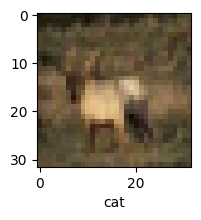

In [27]:
plot_sampel(X_train,y_train,3)

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8159 - accuracy: 0.3503
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6244 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5424 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4814 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4339 - accuracy: 0.4942


In [30]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.55      0.55      1000
           1       0.69      0.48      0.57      1000
           2       0.37      0.35      0.36      1000
           3       0.35      0.34      0.34      1000
           4       0.45      0.33      0.38      1000
           5       0.43      0.30      0.36      1000
           6       0.45      0.64      0.53      1000
           7       0.58      0.52      0.55      1000
           8       0.64      0.58      0.61      1000
           9       0.42      0.73      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.4825 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1302 - accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0005 - accuracy: 0.6529
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9132 - accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8488 - accuracy: 0.7042
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7902 - accuracy: 0.7251
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7443 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6942 - accuracy: 0.7579
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6582 - accuracy: 0.7713
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9309 - accuracy: 0.6990


[0.9309372305870056, 0.6990000009536743]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[3.28923634e-04, 1.96119165e-03, 2.36657728e-03, 5.84660053e-01,
        2.90638511e-03, 3.91916245e-01, 4.57360875e-03, 1.30967179e-04,
        1.10610062e-02, 9.50482281e-05],
       [1.42327987e-03, 2.05792543e-02, 3.78680215e-06, 4.01114079e-07,
        5.67453426e-08, 4.39236523e-08, 3.39172992e-08, 1.26426771e-08,
        9.77901459e-01, 9.16011340e-05],
       [4.36922684e-02, 6.23993039e-01, 2.41194200e-03, 8.15955363e-03,
        1.77055155e-03, 5.47263399e-03, 8.60690314e-04, 7.79771525e-03,
        2.63651460e-01, 4.21901233e-02],
       [7.65834630e-01, 6.05144212e-03, 9.25987437e-02, 3.25045735e-03,
        6.43571233e-03, 5.15103980e-04, 5.71752957e-04, 2.01494410e-03,
        1.22176245e-01, 5.50891797e-04],
       [5.65372090e-07, 8.22476636e-07, 3.47878481e-03, 6.42744750e-02,
        5.57386160e-01, 4.51896514e-04, 3.74404490e-01, 5.24200559e-08,
        2.54505426e-06, 8.58745253e-08]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [36]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

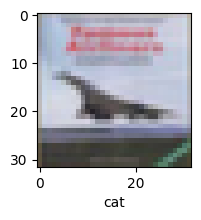

In [40]:
plot_sampel(X_test, y_test,3)

In [41]:
classes[y_classes[3]]

'airplane'

In [42]:
classes[y_classes[3]]

'airplane'